# Import lib

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

# os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# sys.path.append('../lib/')
sys.path.append('./lib/')

import juice_cdf_lib as juice_cdf

# Setting and Read CDF file

In [3]:
# *** Parameter set ***
spec_mode = 1                           # 0: low-resoltion   1: high-resolution
cal_mode = 0                            # 0: raw    1: dBm    2: V2    3: V2/Hz
cal = 0                                 # 0: background   1: cal

E_power_min = 1e-4                      # E_power_min: 10e-4 (--> -144 dBm)
f_max = 45000                           # f_max [kHz]
f_min = 80                              # f_min [kHz]
p_max = 8.0                             # background: 8   CAL: 10
p_min = 1.5                             # background: 2   CAL: 5

cf = 0.0
if cal_mode == 1:
    cf = -104.1                         # Conversion factor: Raw value @ ADC input to dBm
p_max = p_max + cf/10
p_min = p_min + cf/10
if spec_mode == 1:
    p_max = p_max - 1.5
    p_min = p_min - 1.5

# *** Folder set ***
work_dir = '/Users/user/0-python/JUICE_notebook/ql/'   # Plot dump folder
data_dir = '/Users/user/0-python/JUICE_GS_test/cdf/'   # Data folder

In [4]:
# *** NECP ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T135849-20230419T141229_V01___RPR1_52000000_2023.109.16.17.21.607.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T141231-20230419T141402_V01___RPR1_52000001_2023.109.17.51.54.600.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100927-20230530T100937_V01___RPR1_52000011_2023.150.10.41.53.508.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T120759-20230601T120857_V01___RPR1_52000015_2023.152.12.32.12.471.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T121435-20230601T121533_V01___RPR1_52000016_2023.152.13.14.38.473.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122138-20230601T122236_V01___RPR1_52000017_2023.152.13.55.02.539.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122707-20230601T122805_V01___RPR1_52000018_2023.152.14.35.37.467.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T123416-20230601T123514_V01___RPR1_52000019_2023.152.15.15.55.483.cdf'

# *** High-samp rate ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000304-20000101T000308_V01___TMIDX_00000_32.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000150-20000101T000154_V01___TMIDX_00000_64.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000355-20000101T000359_V01___TMIDX_00000_96.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000555-20000101T000559_V01___TMIDX_00000_128.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000725-20000101T000730_V01___TMIDX_00000_256.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000131-20000101T000139_V01___TMIDX_00000_512.bin.cdf'
data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000031-20000101T000940_V01___HF_SID2_064_20230624-1139.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000050-20000101T000454_V01___HF_SID2_032_20230624-1132.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000111-20000101T000150_V01___HF_SID2_128_20230624-1306.ccs.cdf'

# *** Ver.2 ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000459-20000101T000700_V01___HF_20210920-1007.ccs.cdf'

cdf_file = data_dir + data_name
# %ls $data_dir
%ls $cdf_file

/Users/user/0-python/JUICE_GS_test/cdf/JUICE_L1a_RPWI-HF-SID2_20000101T000031-20000101T000940_V01___HF_SID2_064_20230624-1139.ccs.cdf


# get SID-2 data

In [5]:
cdf = pycdf.CDF(cdf_file)
data = juice_cdf.juice_getdata_hf_sid02(cdf)

# Raw data

2000/01/01


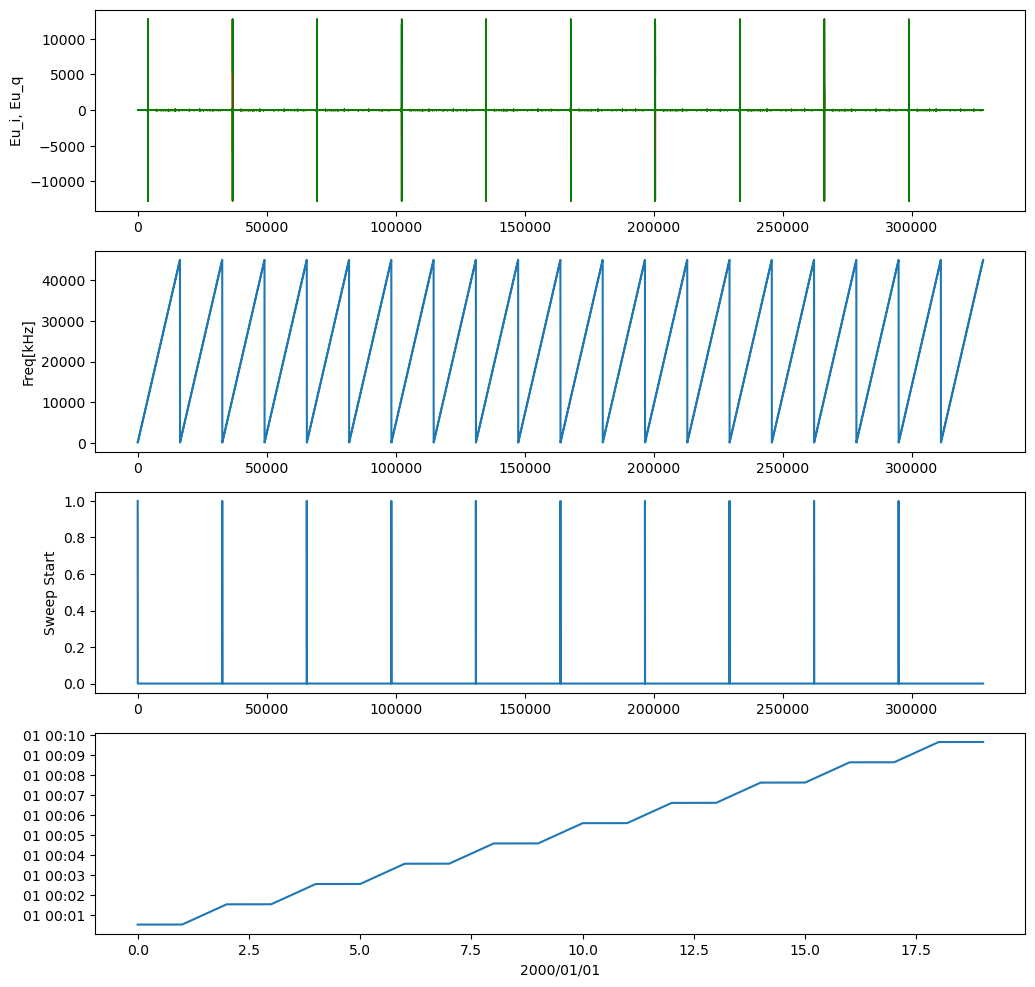

In [6]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(np.ravel(data.Eu_i), '-r', linewidth=1)
ax1.plot(np.ravel(data.Eu_q), '-g', linewidth=1)
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.sweep_start))
ax4.plot(np.ravel(data.epoch))
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
print(date)

ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Sweep Start')
ax4.set_xlabel(date)

# xlim=[458239, 458241]
# ax1.set_xlim(xlim)
# ax2.set_xlim(xlim)
# ax3.set_xlim(xlim)
plt.show()
png_fname = work_dir+data_name+'_raw.png'
fig.savefig(png_fname)


In [7]:
# Sped mode:  0 - low resolution,  1 - high resolution  
spec = juice_cdf.juice_getspec_hf_sid02(data, spec_mode)

spec.Eu_power = spec.Eu_power * 10**(cf/10)
spec.Ev_power = spec.Ev_power * 10**(cf/10)
spec.Ew_power = spec.Ew_power * 10**(cf/10)
spec.Eu_power_dB = 10.0 * np.log10(spec.Eu_power)
spec.Ev_power_dB = 10.0 * np.log10(spec.Ev_power)
spec.Ew_power_dB = 10.0 * np.log10(spec.Ew_power)

n_time = spec.Eu_power.shape[1]
n_freq = spec.Eu_power.shape[0]
print(spec.Eu_power.shape, n_time, n_freq)

(array([     0,  32768,  65536,  98304, 131072, 163840, 196608, 229376,
       262144, 294912, 327680]),)
[ 0 0 2000-01-01 00:00:31.291199 ] length: 32768 == 64 * 512
[ 1 1 2000-01-01 00:01:32.291214 ] length: 32768 == 64 * 512
[ 2 2 2000-01-01 00:02:33.291183 ] length: 32768 == 64 * 512
[ 3 3 2000-01-01 00:03:34.291260 ] length: 32768 == 64 * 512
[ 4 4 2000-01-01 00:04:35.291214 ] length: 32768 == 64 * 512
[ 5 5 2000-01-01 00:05:36.291214 ] length: 32768 == 64 * 512
[ 6 6 2000-01-01 00:06:37.291183 ] length: 32768 == 64 * 512
[ 7 7 2000-01-01 00:07:38.291214 ] length: 32768 == 64 * 512
[ 8 8 2000-01-01 00:08:39.291183 ] length: 32768 == 64 * 512
[ 9 9 2000-01-01 00:09:40.291229 ] length: 32768 == 64 * 512
(32768, 10) 10 32768


/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_25465/1014528034.py:7: RuntimeWarning: divide by zero encountered in log10
  spec.Eu_power_dB = 10.0 * np.log10(spec.Eu_power)
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_25465/1014528034.py:9: RuntimeWarning: divide by zero encountered in log10
  spec.Ew_power_dB = 10.0 * np.log10(spec.Ew_power)


# Spectra

# LOG: Frequency - Power

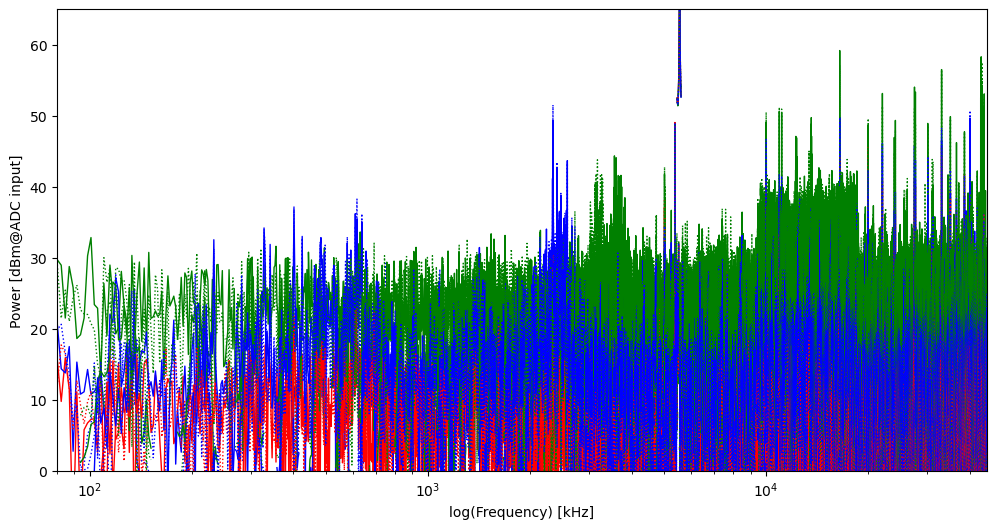

"\nfig = plt.figure(figsize=(12, 12))\nax1 = fig.add_subplot(3, 1, 1)\nax2 = fig.add_subplot(3, 1, 2)\nax3 = fig.add_subplot(3, 1, 3)\n\nfor i in range(spec.n_step):\n    ax1.plot(np.log10(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0]), spec.Eu_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)\n    ax2.plot(np.log10(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0]), spec.Ev_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)\n    ax3.plot(np.log10(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0]), spec.Ew_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)\n\nax3.set_xlabel('Frequency [kHz]')\nax1.set_ylabel('Power Eu [dBm@ADC input]')\nax2.set_ylabel('Power Ev [dBm@ADC input]')\nax3.set_ylabel('Power Ew [dBm@ADC input]')\n"

In [8]:
fig = plt.figure(figsize=(12, 6))

for i in range(spec.n_step):
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Eu_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ev_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ew_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':b', linewidth=1)

plt.xlabel('log(Frequency) [kHz]')
plt.xscale('log')
plt.xlim(f_min, f_max)

plt.ylabel('Power [dBm@ADC input]')
plt.ylim(10*p_min, 10*p_max)

plt.show()
png_fname = work_dir+data_name+'_spec-log.png'
fig.savefig(png_fname)

"""
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

for i in range(spec.n_step):
    ax1.plot(np.log10(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0]), spec.Eu_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    ax2.plot(np.log10(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0]), spec.Ev_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    ax3.plot(np.log10(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0]), spec.Ew_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)

ax3.set_xlabel('Frequency [kHz]')
ax1.set_ylabel('Power Eu [dBm@ADC input]')
ax2.set_ylabel('Power Ev [dBm@ADC input]')
ax3.set_ylabel('Power Ew [dBm@ADC input]')
"""

# Linear: Frequency - Power diagram

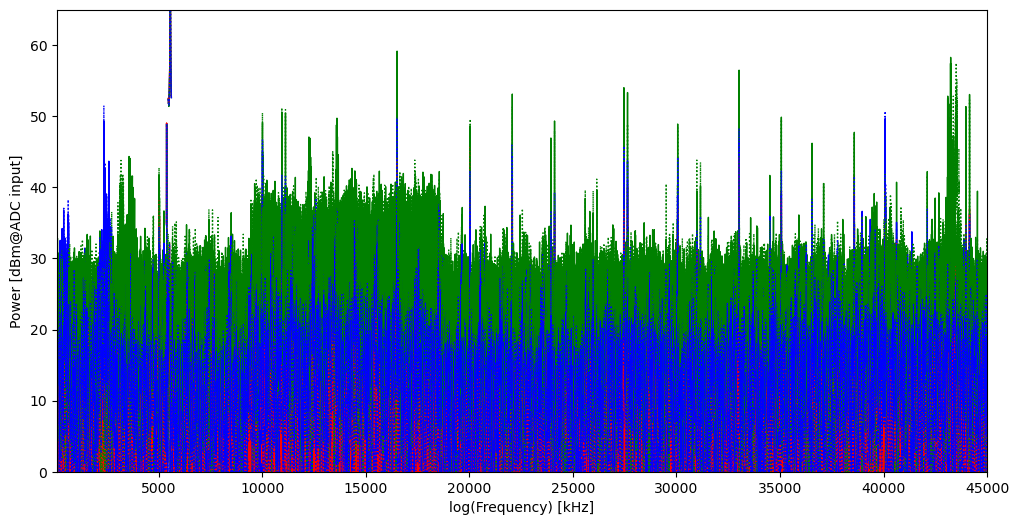

"\nfig = plt.figure(figsize=(12, 12))\nax1 = fig.add_subplot(3, 1, 1)\nax2 = fig.add_subplot(3, 1, 2)\nax3 = fig.add_subplot(3, 1, 3)\n\nfor i in range(spec.n_step):\n    ax1.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)\n    ax2.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)\n    ax3.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)\n\nax3.set_xlabel('Frequency [kHz]')\nax1.set_ylabel('Power Eu [dBm@ADC input]')\nax2.set_ylabel('Power Ev [dBm@ADC input]')\nax3.set_ylabel('Power Ew [dBm@ADC input]')\n"

In [9]:
fig = plt.figure(figsize=(12, 6))

for i in range(spec.n_step):
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Eu_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ev_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ew_power_dB[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':b', linewidth=1)


plt.xlabel('log(Frequency) [kHz]')
plt.xlim(f_min, f_max)

plt.ylabel('Power [dBm@ADC input]')
plt.ylim(10*p_min, 10*p_max)

plt.show()
png_fname = work_dir+data_name+'_spec.png'
fig.savefig(png_fname)

"""
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

for i in range(spec.n_step):
    ax1.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    ax2.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    ax3.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power_dBm[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)

ax3.set_xlabel('Frequency [kHz]')
ax1.set_ylabel('Power Eu [dBm@ADC input]')
ax2.set_ylabel('Power Ev [dBm@ADC input]')
ax3.set_ylabel('Power Ew [dBm@ADC input]')
"""

# LOG: Frequency - Time diagram

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_25465/775966760.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = plt.pcolormesh(spec.epoch, np.log10(spec.frequency), spec.Eu_power_dB, vmin=p_min*10, vmax=p_max*10, cmap='jet')


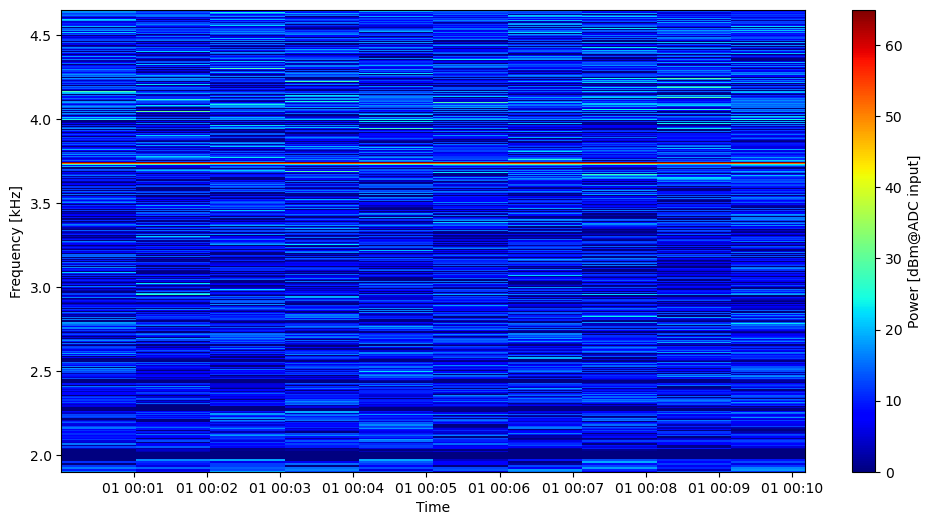

In [10]:
# import matplotlib.colors as colors  # import it to display in logscale

fig = plt.figure(figsize=(12, 6))

mesh = plt.pcolormesh(spec.epoch, np.log10(spec.frequency), spec.Eu_power_dB, vmin=p_min*10, vmax=p_max*10, cmap='jet')
plt.colorbar(mesh, label='Power [dBm@ADC input]')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time')
plt.ylim(np.log10(f_min), np.log10(f_max))

png_fname = work_dir+data_name+'_FT-log.png'
# fig.savefig(png_fname)

# Linear: Frequency - Time diagram

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_25465/1108921801.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = plt.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power_dB, vmin=p_min*10, vmax=p_max*10, cmap='jet')


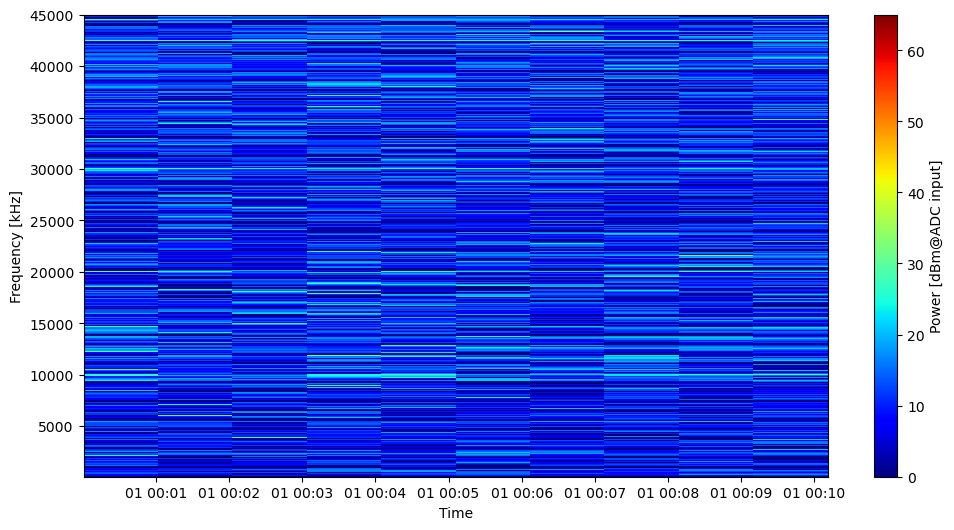

In [11]:
# import matplotlib.colors as colors  # import it to display in logscale

fig = plt.figure(figsize=(12, 6))
mesh = plt.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power_dB, vmin=p_min*10, vmax=p_max*10, cmap='jet')
plt.colorbar(mesh, label='Power [dBm@ADC input]')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time')
plt.ylim(f_min, f_max)

png_fname = work_dir+data_name+'_FT.png'
# fig.savefig(png_fname)